In [11]:
# Image analysis packages

import numpy as np
from skimage.util import crop
import os
import sys
import argparse
import tifffile
from skimage import io
from skimage import exposure
from matplotlib import pyplot as plt

In [1]:
# working with .raw files

# get file
im = np.fromfile('merged.raw', dtype = np.uint16)

# change shape
im = im.reshape(10000, 1024, 414)

# delete first rows in 0 axis
im = np.delete(im,np.s_[0:69],axis=0)

# save file to .raw
im.astype('uint16').tofile('merged2.raw')

IOError: [Errno 2] No such file or directory: 'merged.raw'

In [7]:
# working with .tif files

im = tifffile.imread('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/20180109_200nm_tet_beads1.1547048975113.tif')
im.shape

#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch2_beads.tif',im, imagej = True)

(300, 1024, 1024)

In [41]:
# Ch2 crop
crop_amt = ((0, 0), (0, 0), (610, 0))
ch2 = crop(im,crop_amt)
ch2.shape
#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch2_beads.tif',im, imagej = True)

(300, 1024, 414)

In [42]:
# Ch1 crop
crop_amt = ((0, 0), (0, 0), (0, 610))
ch1 = crop(im,crop_amt)
ch1.shape
#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch1_beads.tif',im, imagej = True)

(300, 1024, 414)

In [97]:
# get smFISH data from ONI file
im = tifffile.imread('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20181228_20181228_rRNA_PAINT_ATTO655_1in20/20181228_rRNA_PAINT_ATTO655_1in20__LP80_50ms.1546002133942_0.tif')
crop_amt = ((0, 0), (0, 0), (0, 610))
ch1 = crop(im,crop_amt)
ch1.shape
#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch1_beads.tif',im, imagej = True)

(1021, 1024, 414)

In [107]:
tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20181228_20181228_rRNA_PAINT_ATTO655_1in20/20181228_rRNA_PAINT_ATTO655_1in20__LP80_50ms.1546002133942_0_ch1.tif',ch1, imagej = True)



In [84]:
# Merge images
#merge = ()
merge = np.append(ch1,ch2)
merge = merge.reshape(2, 300, 1024, 414)
merge.shape

# Change data structure to make image-j happy
print "changing format from:"
print (merge.shape)
merge = np.rollaxis(merge,0,1)
print(merge.shape)
            
#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch1_ch2_beads_huygens.tif',merge, imagej = True)

ValueError: total size of new array must be unchanged

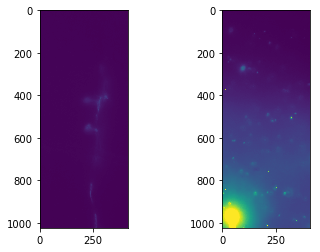

In [58]:
# show images

%matplotlib inline

f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(ch1[10])
f.add_subplot(1,2, 2)
plt.imshow(ch2[10])
plt.show(block=True)

#log_img = exposure.adjust_log(dset, 1)
#gamma_img = exposure.adjust_gamma(dset, 1)
#plt.imshow(dset[0, 15,0], cmap='gray')
#plt.imshow(log_img[0, 15,0], cmap='gray')
#plt.imshow(gamma_img[0, 15,0], cmap='gray')

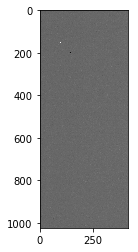

In [106]:
#plt.imshow(ch1[0])
log_img = exposure.adjust_log(ch1[75], 50)
plt.imshow(log_img, cmap='gray')